In [2]:
! pip install scikit-learn-extra
! pip install kmodes

In [19]:

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster._kmeans import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
import plotly.express as px
sns.set()

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 500)


In [4]:

data = pd.read_csv("DataByCategories.csv", low_memory = False)
data


,member_noSource,category_desc,Total
0,224,Clothing,30089.9
1,228,Clothing,63332.3
2,309,Clothing,56868.5
3,312,Clothing,38503.1
4,321,Clothing,14340.8
...,...,...,...
47462,9998,Misc,479233.7
47463,9999,Misc,545850.4
47464,10000,Misc,520956.5
47465,2409,Travel,19231.4


In [5]:

members_reg_gen = pd.read_csv("members-regions-gender.csv",low_memory=False,sep=';')

df_new = data.pivot(index='member_noSource' ,columns='category_desc', values='Total').reset_index()
df_new.fillna(0, inplace=True)

df_new

category_desc,member_noSource,Clothing,Communication,Electronics,Entertainment,Groceries,Home Supplies,Lodging,Meals,Misc,Travel
0,63,0.0,0.0,0.0,0.0,0.0,8612.3,0.0,0.0,0.0,0.0
1,80,0.0,0.0,0.0,0.0,6645.8,0.0,0.0,0.0,0.0,0.0
2,83,0.0,0.0,56629.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,0.0,0.0,0.0,0.0,28704.8,0.0,0.0,0.0,0.0,0.0
4,89,0.0,0.0,0.0,0.0,0.0,0.0,25763.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9109,9996,207347.3,303037.7,271819.2,283497.3,432410.2,372748.3,687549.6,294282.5,232546.6,0.0
9110,9997,516238.1,292338.0,423454.7,298997.2,525375.6,486656.3,397417.5,285566.4,375627.2,0.0
9111,9998,447770.9,309085.0,677256.6,206469.1,550512.6,206537.5,447428.9,369454.1,479233.7,0.0
9112,9999,334860.8,253208.3,723120.0,575626.4,257825.3,243375.8,211706.6,429149.0,545850.4,0.0


In [6]:

source_mem = df_new['member_noSource']

df_new=  df_new.drop('member_noSource',axis=1)

df_new

category_desc,Clothing,Communication,Electronics,Entertainment,Groceries,Home Supplies,Lodging,Meals,Misc,Travel
0,0.0,0.0,0.0,0.0,0.0,8612.3,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,6645.8,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,56629.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,28704.8,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,25763.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9109,207347.3,303037.7,271819.2,283497.3,432410.2,372748.3,687549.6,294282.5,232546.6,0.0
9110,516238.1,292338.0,423454.7,298997.2,525375.6,486656.3,397417.5,285566.4,375627.2,0.0
9111,447770.9,309085.0,677256.6,206469.1,550512.6,206537.5,447428.9,369454.1,479233.7,0.0
9112,334860.8,253208.3,723120.0,575626.4,257825.3,243375.8,211706.6,429149.0,545850.4,0.0


In [7]:

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_new)
df = pd.DataFrame(x_scaled)

df['member_noSource'] = source_mem

df

,0,1,2,3,4,5,6,7,8,9,member_noSource
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.014824,0.000000,0.000000,0.000000,0.0,63
1,0.000000,0.000000,0.000000,0.000000,0.010630,0.000000,0.000000,0.000000,0.000000,0.0,80
2,0.000000,0.000000,0.066009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,83
3,0.000000,0.000000,0.000000,0.000000,0.045912,0.000000,0.000000,0.000000,0.000000,0.0,84
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037472,0.000000,0.000000,0.0,89
...,...,...,...,...,...,...,...,...,...,...,...
9109,0.354884,0.451431,0.316842,0.492502,0.691617,0.641579,1.000000,0.470029,0.352460,0.0,9996
9110,0.883564,0.435492,0.493594,0.519429,0.840310,0.837639,0.578020,0.456107,0.569321,0.0,9997
9111,0.766379,0.460439,0.789434,0.358686,0.880515,0.355495,0.650759,0.590093,0.726352,0.0,9998
9112,0.573129,0.377201,0.842894,1.000000,0.412378,0.418901,0.307915,0.685438,0.827320,0.0,9999


In [8]:
d = pd.merge(df,members_reg_gen,left_on='member_noSource',right_on='member_noSource',how="inner")

d

,0,1,2,3,4,5,6,7,8,9,member_noSource,region_noSource,gender
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.014824,0.000000,0.000000,0.000000,0.0,63,8,0
1,0.000000,0.000000,0.000000,0.000000,0.010630,0.000000,0.000000,0.000000,0.000000,0.0,80,7,1
2,0.000000,0.000000,0.066009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,83,5,0
3,0.000000,0.000000,0.000000,0.000000,0.045912,0.000000,0.000000,0.000000,0.000000,0.0,84,2,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037472,0.000000,0.000000,0.0,89,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9109,0.354884,0.451431,0.316842,0.492502,0.691617,0.641579,1.000000,0.470029,0.352460,0.0,9996,8,1
9110,0.883564,0.435492,0.493594,0.519429,0.840310,0.837639,0.578020,0.456107,0.569321,0.0,9997,3,0
9111,0.766379,0.460439,0.789434,0.358686,0.880515,0.355495,0.650759,0.590093,0.726352,0.0,9998,3,1
9112,0.573129,0.377201,0.842894,1.000000,0.412378,0.418901,0.307915,0.685438,0.827320,0.0,9999,2,0


In [9]:
lastData=df.copy()

lastData = lastData.drop('member_noSource',axis=1)

lastData

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.014824,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.010630,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.066009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.045912,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037472,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
9109,0.354884,0.451431,0.316842,0.492502,0.691617,0.641579,1.000000,0.470029,0.352460,0.0
9110,0.883564,0.435492,0.493594,0.519429,0.840310,0.837639,0.578020,0.456107,0.569321,0.0
9111,0.766379,0.460439,0.789434,0.358686,0.880515,0.355495,0.650759,0.590093,0.726352,0.0
9112,0.573129,0.377201,0.842894,1.000000,0.412378,0.418901,0.307915,0.685438,0.827320,0.0


In [10]:
wcss = []


In [11]:

for i in range(1, 11):
    kMeans = KMeans(n_clusters=i, random_state=0)
    kMeans.fit(lastData)
    wcss.append(kMeans.inertia_)


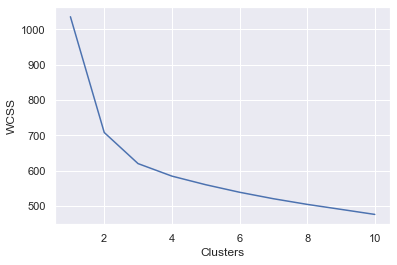

In [12]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:

kMeans = KMeans(n_clusters=3, random_state=0)
clust = kMeans.fit_predict(lastData)


In [14]:
df_new.insert(0, "Cluster", clust, True)
df_new

category_desc,Cluster,Clothing,Communication,Electronics,Entertainment,Groceries,Home Supplies,Lodging,Meals,Misc,Travel
0,1,0.0,0.0,0.0,0.0,0.0,8612.3,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,6645.8,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,56629.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,28704.8,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,25763.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9109,2,207347.3,303037.7,271819.2,283497.3,432410.2,372748.3,687549.6,294282.5,232546.6,0.0
9110,2,516238.1,292338.0,423454.7,298997.2,525375.6,486656.3,397417.5,285566.4,375627.2,0.0
9111,2,447770.9,309085.0,677256.6,206469.1,550512.6,206537.5,447428.9,369454.1,479233.7,0.0
9112,2,334860.8,253208.3,723120.0,575626.4,257825.3,243375.8,211706.6,429149.0,545850.4,0.0


In [15]:

df_new['member_noSource'] = source_mem

df_new

category_desc,Cluster,Clothing,Communication,Electronics,Entertainment,Groceries,Home Supplies,Lodging,Meals,Misc,Travel,member_noSource
0,1,0.0,0.0,0.0,0.0,0.0,8612.3,0.0,0.0,0.0,0.0,63
1,1,0.0,0.0,0.0,0.0,6645.8,0.0,0.0,0.0,0.0,0.0,80
2,1,0.0,0.0,56629.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83
3,1,0.0,0.0,0.0,0.0,28704.8,0.0,0.0,0.0,0.0,0.0,84
4,1,0.0,0.0,0.0,0.0,0.0,0.0,25763.6,0.0,0.0,0.0,89
...,...,...,...,...,...,...,...,...,...,...,...,...
9109,2,207347.3,303037.7,271819.2,283497.3,432410.2,372748.3,687549.6,294282.5,232546.6,0.0,9996
9110,2,516238.1,292338.0,423454.7,298997.2,525375.6,486656.3,397417.5,285566.4,375627.2,0.0,9997
9111,2,447770.9,309085.0,677256.6,206469.1,550512.6,206537.5,447428.9,369454.1,479233.7,0.0,9998
9112,2,334860.8,253208.3,723120.0,575626.4,257825.3,243375.8,211706.6,429149.0,545850.4,0.0,9999


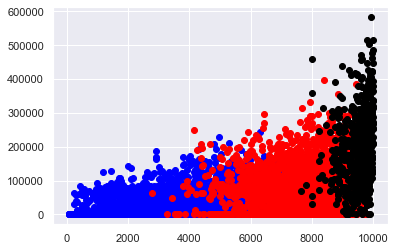

In [16]:
d=df_new

x = 'member_noSource'
y = 'Clothing'

red = d[d["Cluster"] == 0]
blue = d[d["Cluster"]== 1]
black = d[d["Cluster"] == 2]


plt.scatter(blue[x], blue[y], color='blue')
plt.scatter(red[x], red[y], color='red')
plt.scatter(black[x], black[y], color='black')

# Show the plot
plt.show()

In [17]:
maxCategories = pd.DataFrame({'cluster': [], 'categorie': [], 'avg' : []})


for cluster in range(0,3):
    clustData = d[d["Cluster"] == cluster]
    clustData = clustData[['Clothing','Communication','Electronics','Entertainment','Groceries','Home Supplies','Lodging','Meals','Misc','Travel']]
    average_values = clustData.mean()
    top_n_columns = average_values.nlargest(3).index.tolist()
    top_n_columns_avg = average_values.nlargest(3).tolist()
    maxCategories.loc[len(maxCategories.index)] = [cluster,top_n_columns,top_n_columns_avg]

maxCategories

    

e:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,cluster,categorie,avg
0,0.0,"[Home Supplies, Misc, Groceries]","[87327.34302773491, 86026.62076271197, 85135.8..."
1,1.0,"[Lodging, Electronics, Communication]","[25450.61421034715, 24740.986521443196, 24431...."
2,2.0,"[Meals, Clothing, Electronics]","[194963.43052959518, 193118.24376947046, 18703..."


In [30]:
df = df_new[['Cluster','Clothing','Communication','Electronics','Entertainment','Groceries','Home Supplies','Lodging','Meals','Misc','Travel']]
categories = ['Clothing','Communication','Electronics','Entertainment','Groceries','Home Supplies','Lodging','Meals','Misc','Travel']

df

category_desc,Cluster,Clothing,Communication,Electronics,Entertainment,Groceries,Home Supplies,Lodging,Meals,Misc,Travel
0,1,0.0,0.0,0.0,0.0,0.0,8612.3,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,6645.8,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,56629.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,28704.8,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,25763.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9109,2,207347.3,303037.7,271819.2,283497.3,432410.2,372748.3,687549.6,294282.5,232546.6,0.0
9110,2,516238.1,292338.0,423454.7,298997.2,525375.6,486656.3,397417.5,285566.4,375627.2,0.0
9111,2,447770.9,309085.0,677256.6,206469.1,550512.6,206537.5,447428.9,369454.1,479233.7,0.0
9112,2,334860.8,253208.3,723120.0,575626.4,257825.3,243375.8,211706.6,429149.0,545850.4,0.0


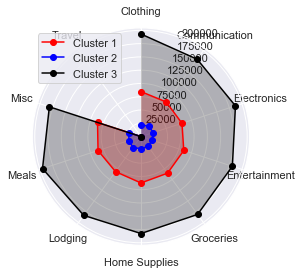

In [46]:
# number of clusters
num_clusters = 3

num_categories = len(categories)

# create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(np.linspace(0, 2*np.pi, num_categories, endpoint=False))
ax.set_xticklabels(categories)

# plot each cluster in a different color
colors = ['red', 'blue' , 'black']

for i, color in enumerate(colors):
    cluster = df[df['Cluster'] == i][categories].mean()
    angles = np.linspace(0, 2*np.pi, num_categories, endpoint=False)
    ax.plot(angles, cluster, 'o-', c=color, label=f'Cluster {i+1}')
    ax.fill(angles, cluster, color, alpha=0.25)

ax.legend()
plt.show()